In [19]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

white or red wine 분류

In [20]:
wine = pd.read_csv('https://bit.ly/wine-date')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [21]:
wine.info()
wine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


<Axes: >

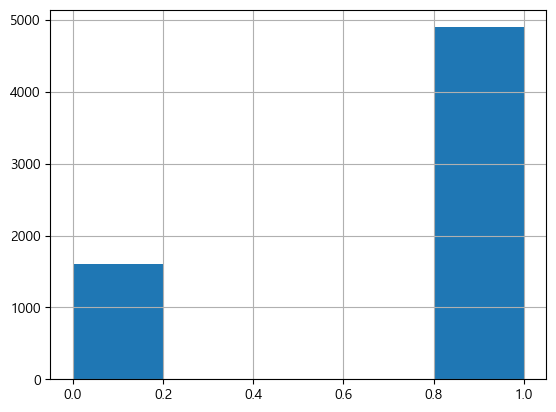

In [22]:
wine['class'].hist(bins=5)

<Axes: >

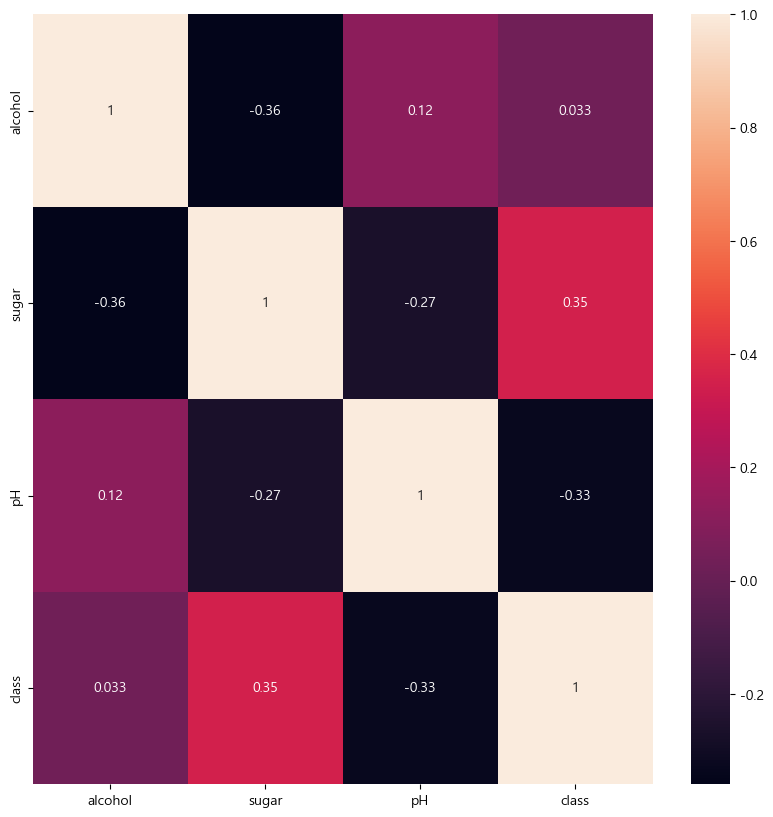

In [23]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(wine.corr(),annot = True)

In [24]:
# 로지스틱회귀
input = wine[['alcohol','sugar','pH']]
input.to_numpy()
target = wine['class']
target.to_numpy()

array([0., 0., 0., ..., 1., 1., 1.])

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(input)
train = ss.transform(input)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df2 = pd.DataFrame(train)
df2.columns = input.columns
df2

,alcohol,sugar,pH
0,-0.915464,-0.744778,1.813090
1,-0.580068,-0.597640,-0.115073
2,-0.580068,-0.660699,0.258120
3,-0.580068,-0.744778,-0.363868
4,-0.915464,-0.744778,1.813090
...,...,...,...
6492,0.593818,-0.807837,0.320319
6493,-0.747766,0.537425,-0.426067
6494,-0.915464,-0.891916,-1.421248
6495,1.935402,-0.912936,0.755710


In [26]:
train_into, test_into, train_target, test_target = train_test_split(train,target)
lr = LogisticRegression()
lr.fit(train_into, train_target)
print(lr.score(train_into, train_target))
print(lr.score(test_into, test_target))


0.7807881773399015
0.7772307692307693


In [27]:
proba = lr.predict_proba(test_into[:10])
np.round(proba,decimals=4)

array([[0.4553, 0.5447],
       [0.16  , 0.84  ],
       [0.2757, 0.7243],
       [0.3852, 0.6148],
       [0.0506, 0.9494],
       [0.0044, 0.9956],
       [0.0037, 0.9963],
       [0.4698, 0.5302],
       [0.103 , 0.897 ],
       [0.0872, 0.9128]])

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

In [29]:
# 경사하강법
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='log_loss',max_iter=3000,tol=None)
sg.fit(train_into,train_target)
print(sg.score(train_into, train_target))
print(sg.score(test_into, test_target))

0.7801724137931034
0.7778461538461539


In [30]:
tr = []
te = []
classes = np.unique(train_target)
for i in range(300):
    sg.partial_fit(train_into,train_target,classes=classes)
    tr.append(sg.score(train_into, train_target))
    te.append(sg.score(test_into, test_target))

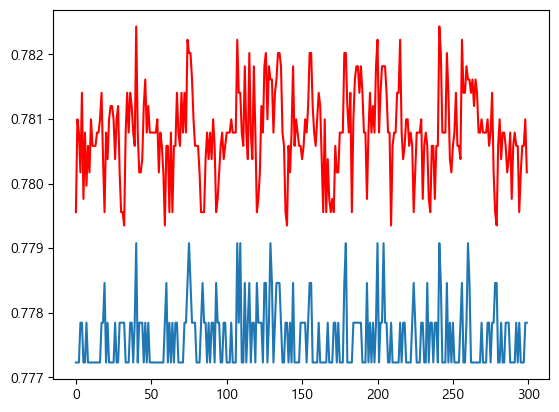

In [31]:
plt.plot(tr,color='red')
plt.plot(te)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_into,train_target)
print(dt.score(train_into,train_target))
print(dt.score(test_into,test_target))
# 순수노드 나올 때까지 훈련


0.8446223316912972
0.8436923076923077


In [33]:
# min_impurity_decrease 최소 불순도 조정해서 속도개선, 효율도 올릴 수 있도록 모델을 조정
# 부모의 불순도 - 자식의 불순도 (크기가 큰 쪽 선택, 차이가 0.005이하면 결정)
# 과대적합 해결 - max_depth, min_impuruty_decrease
dt = DecisionTreeClassifier(min_impurity_decrease=0.001,random_state=42)
dt.fit(train_into,train_target)
print(dt.score(train_into,train_target))
print(dt.score(test_into,test_target))

0.8739737274220033
0.8584615384615385


In [34]:
from sklearn.tree import plot_tree
# plt.figure(figsize=(10,7))
# plot_tree(dt)
# plt.show()

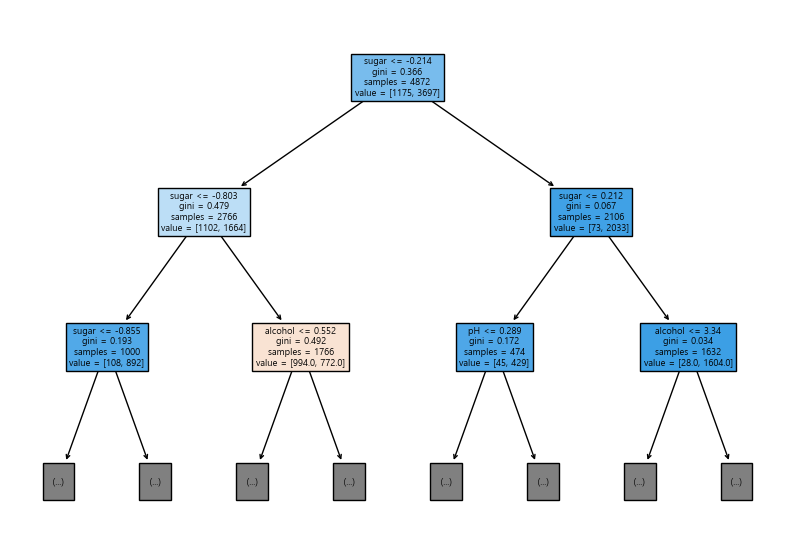

In [39]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])    
# max_depth : 깊이 조정 , filles : 색상 조정(찐파랑:양성1)(주황:음성0)
plt.show()

In [36]:
# 가지치기로 과대적합 문제를 해결
# 3,4,5,6, ... 10까지 바꿔봐야 함. 가장 졿은 적용
dt = DecisionTreeClassifier(max_depth=30000,random_state=42)
dt.fit(train_into,train_target)
print(dt.score(train_into,train_target))
print(dt.score(test_into,test_target))

0.9973316912972086
0.8553846153846154


In [37]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

[Text(0.6074626899204372, 0.98, 'sugar <= -0.214\ngini = 0.366\nsamples = 4872\nvalue = [1175, 3697]'),
 Text(0.2948836812212423, 0.94, 'sugar <= -0.803\ngini = 0.479\nsamples = 2766\nvalue = [1102, 1664]'),
 Text(0.051915081000766874, 0.9, 'sugar <= -0.855\ngini = 0.193\nsamples = 1000\nvalue = [108, 892]'),
 Text(0.01303680981595092, 0.86, 'pH <= 3.928\ngini = 0.04\nsamples = 532\nvalue = [11, 521]'),
 Text(0.011503067484662576, 0.82, 'pH <= -2.012\ngini = 0.033\nsamples = 530\nvalue = [9, 521]'),
 Text(0.00843558282208589, 0.78, 'alcohol <= 1.558\ngini = 0.298\nsamples = 11\nvalue = [2, 9]'),
 Text(0.006901840490797546, 0.74, 'gini = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.009969325153374233, 0.74, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.014570552147239263, 0.78, 'sugar <= -0.897\ngini = 0.027\nsamples = 519\nvalue = [7, 512]'),
 Text(0.01303680981595092, 0.74, 'gini = 0.0\nsamples = 253\nvalue = [0, 253]'),
 Text(0.016104294478527608, 0.74, 'alcohol <= -0.538\ngini 

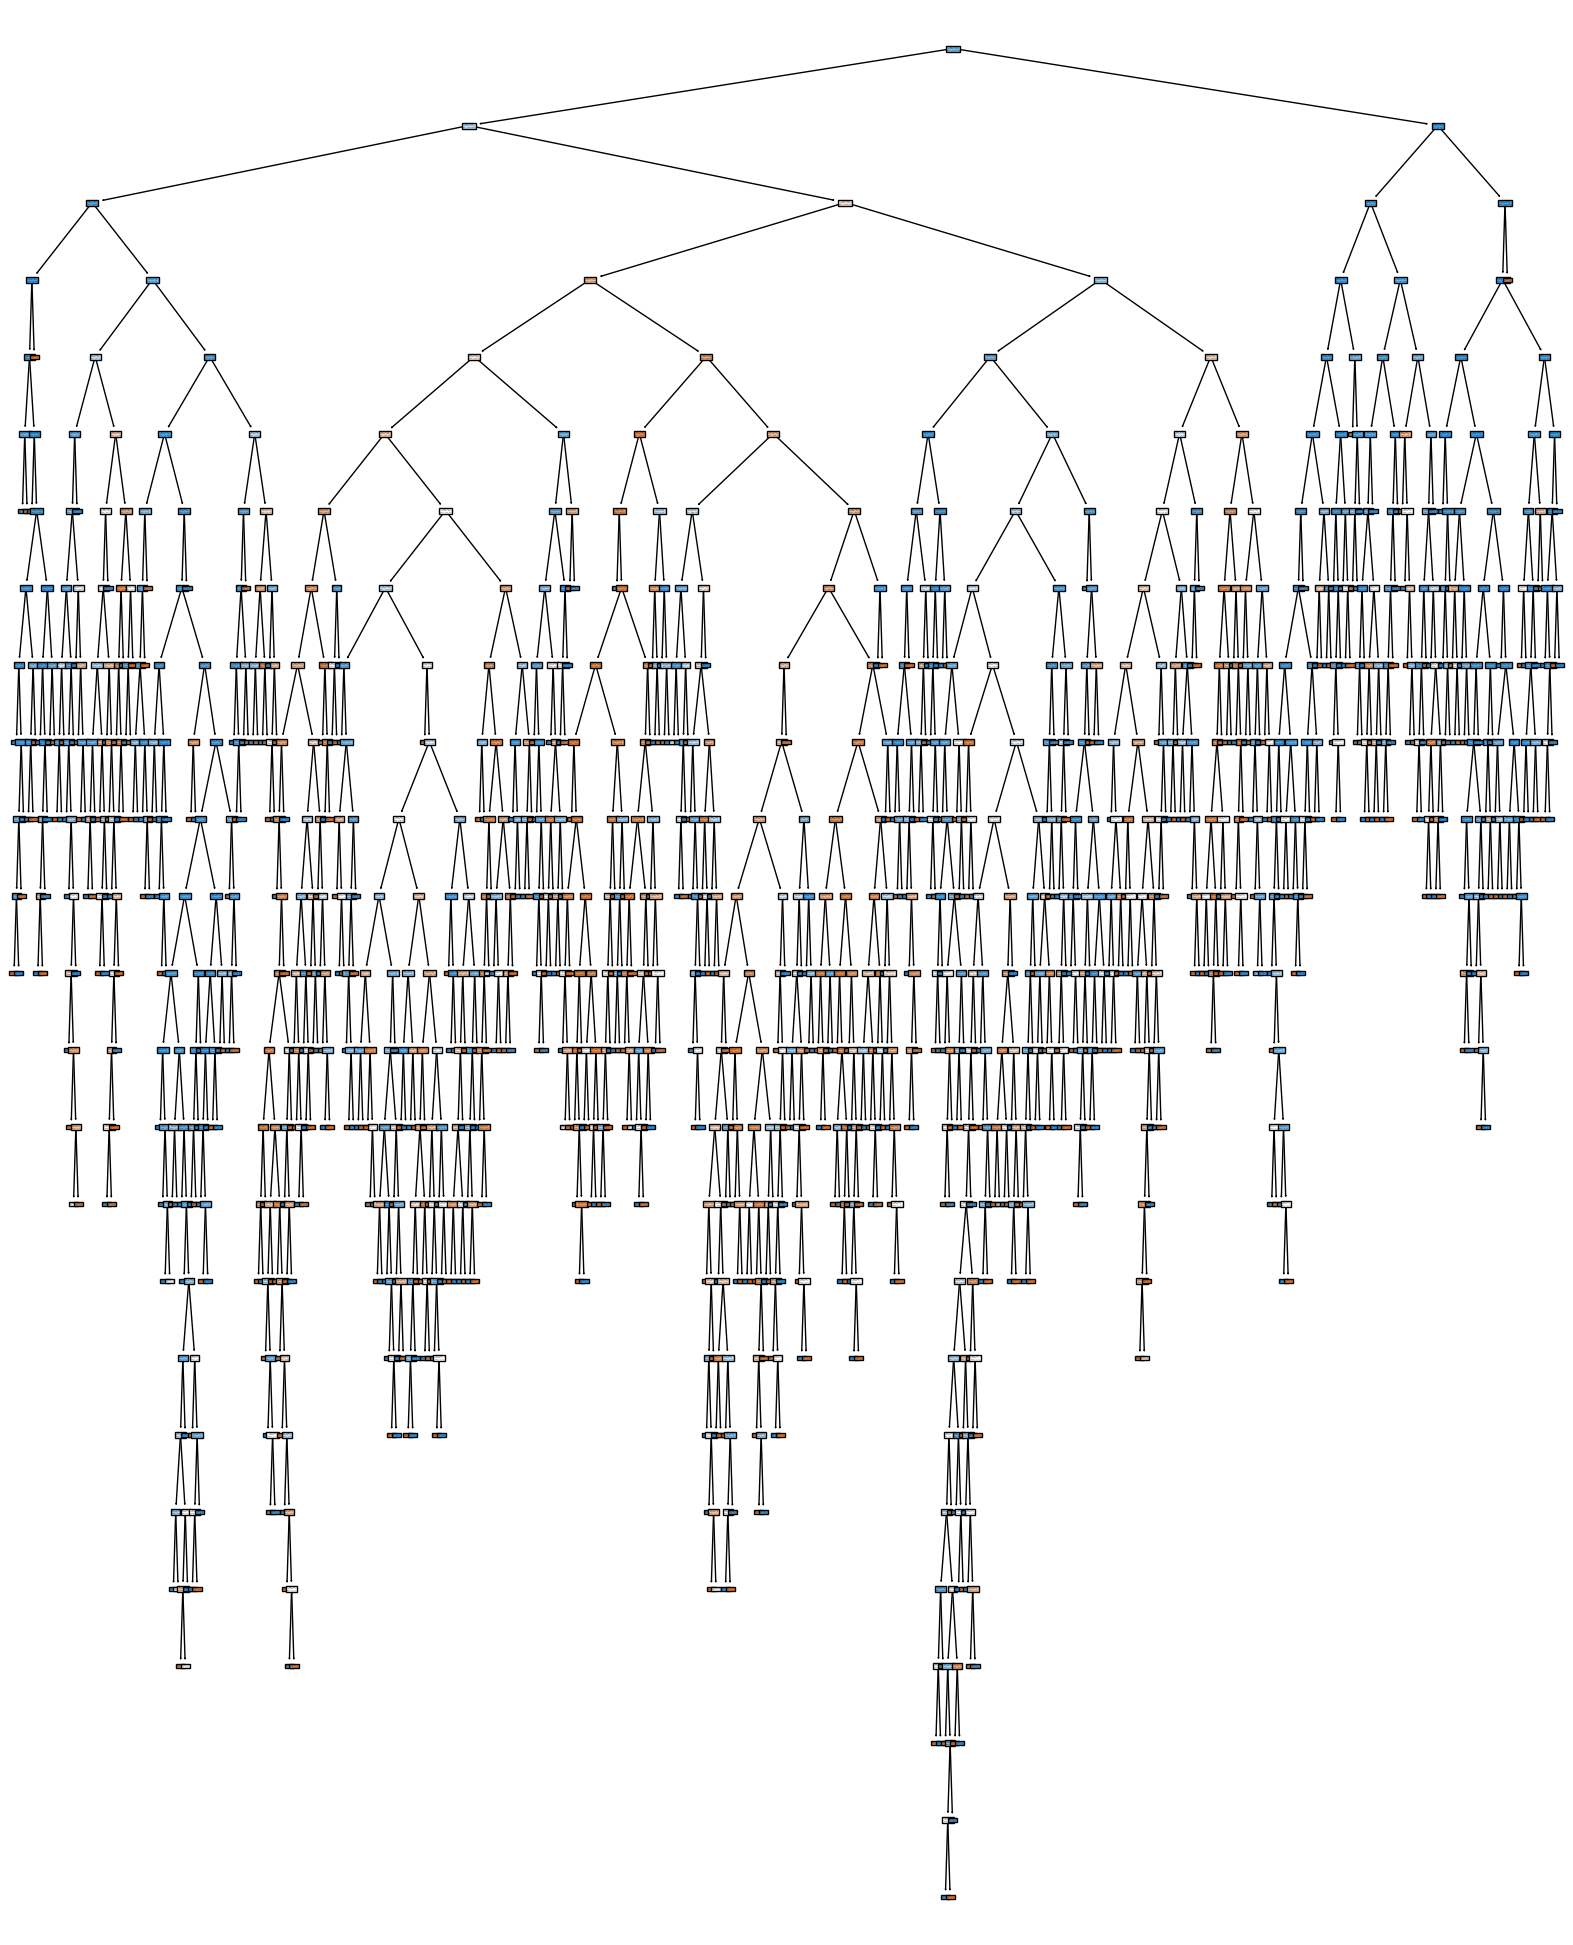

In [38]:
# plt.figure(figsize=(20,25))
# plot_tree(dt,filled=True,feature_names = wine.columns)
